<a href="https://colab.research.google.com/github/beyzahiz/CNN-Model/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1- VERİ YÜKLEME VE ÖN İŞLEME
import tensorflow as tf

# MNIST dataset yükleme
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizasyon -> Piksel değerleri normalde 0-255 arasındadır. Bunlar 255'e bölünerek 0 ile 1 arasına sıkıştırılır.
# Matematiksel işlemlerin daha hızlı ve kararlı olmasını sağlar.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Boyutlandırma: Adet, Yükseklik, Genişlik, Kanal Sayısı.
# Sondaki 1, resmin gri tonlamalı olduğunu belirtir. Renkli olsaydı 3 olurdu.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [2]:
# 2- MODEL 1 - ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

ann_model = Sequential([ #Katmanların arka arkaya dizildiği sıralı bir model yapısı başlatır.
    Flatten(input_shape=(28, 28, 1)),  #Düzleştirme: tek bir uzun çizgiye yani vektöre dönüştürür.
    Dense(128, activation='relu'),  #Gizli katman: Relu. Negatif değerleri sıfırlayarak modelin karar verme yeteneğini artırır.
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') #Çıktı Katmanı. 10 nöron var çünkü 0'dan 9'a kadar 10 farklı rakam tahmin ediliyor. Softmax çıktıları olasılığa dönüştürür.
])

ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#compile: Modeli derler.
#optimizer='adam': Hatayı azaltmak için kullanılan matematiksel algoritma
#loss='sparse_categorical_crossentropy': Hata hesaplama yöntemi.

print("\n--- ANN Model Summary ---")
ann_model.summary()

history_ann = ann_model.fit(  #Eğitim başlatılır.
    x_train, y_train,
    epochs=10,  #Veri setinin üzerinden 10 kere geçilecek.
    batch_size=32,  #Her seferinde 32 resim alıp ağırlıkları günceller.
    validation_split=0.2,  #Eğitim verisinin %20'sini ayırır.
    verbose=1
)

loss_ann, acc_ann = ann_model.evaluate(x_test, y_test, verbose=0)
print("\nANN Test Accuracy:", acc_ann)



--- ANN Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8606 - loss: 0.4739 - val_accuracy: 0.9590 - val_loss: 0.1392
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9638 - loss: 0.1171 - val_accuracy: 0.9681 - val_loss: 0.1046
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9776 - loss: 0.0726 - val_accuracy: 0.9707 - val_loss: 0.0944
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9842 - loss: 0.0519 - val_accuracy: 0.9763 - val_loss: 0.0878
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9867 - loss: 0.0408 - val_accuracy: 0.9759 - val_loss: 0.0866
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9901 - loss: 0.0301 - val_accuracy: 0.9706 - val_loss: 0.1045
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9922 - loss: 0.0242 - val_accuracy: 0.9739 - val_loss: 0.0998
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9935 - loss: 0.0206 - 

In [3]:
# 3- MODEL 2 - CNN (BASİT CNN MODELİ)
from tensorflow.keras.layers import Conv2D, MaxPooling2D

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  #Evrişim Katmanı.
    #Resmin üzerinde 3x3 boyutunda 32 farklı filtre (mercek) gezdirir. Bu filtreler kenarları köşeleri veya dokuları yakalar.
    MaxPooling2D((2,2)),  #Resmi küçültür. 2x2'lik alandaki en büyük değeri alır. Bu sayede işlem yükü azalır.
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(), #Yine düzleştirme
    Dense(128, activation='relu'),  #Çıkarılan özelliklere bakarak karar veren sınıflandırma kısmı.
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\n--- CNN (Simple) Model Summary ---")
cnn_model.summary()

history_cnn = cnn_model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

loss_cnn, acc_cnn = cnn_model.evaluate(x_test, y_test, verbose=0)
print("\nSimple CNN Test Accuracy:", acc_cnn)



--- CNN (Simple) Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8971 - loss: 0.3416 - val_accuracy: 0.9770 - val_loss: 0.0784
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9829 - loss: 0.0541 - val_accuracy: 0.9864 - val_loss: 0.0461
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9886 - loss: 0.0351 - val_accuracy: 0.9875 - val_loss: 0.0420
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9931 - loss: 0.0223 - val_accuracy: 0.9902 - val_loss: 0.0352
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9946 - loss: 0.0169 - val_accuracy: 0.9895 - val_loss: 0.0408
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.9908 - val_loss: 0.0340
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9968 - loss: 0.0099 - val_accuracy: 0.9898 - val_loss: 0.0394
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9967 -

In [4]:
# 4- MODEL 3 - CNN V1 (AZ FİLTRELİ, DAHA BASİT)
cnn_v1 = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),  #Önceki modelde 32 filtre varken burada 16 filtre kullanıldı.
    #Amaç:Daha az parametre ile daha hızlı eğitim sağlamak. MNIST gibi basit veri setlerinde bazen çok fazla filtreye gerek yoktur, bu model bunu test eder.
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(10, activation='softmax')
])

cnn_v1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\n--- CNN V1 (Az Filtreli) Summary ---")
cnn_v1.summary()

history_v1 = cnn_v1.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

loss_v1, acc_v1 = cnn_v1.evaluate(x_test, y_test, verbose=0)
print("\nCNN V1 Test Accuracy:", acc_v1)



--- CNN V1 (Az Filtreli) Summary ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,810 (50.04 KB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8473 - loss: 0.4978 - val_accuracy: 0.9742 - val_loss: 0.0910
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9753 - loss: 0.0817 - val_accuracy: 0.9800 - val_loss: 0.0683
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9806 - loss: 0.0625 - val_accuracy: 0.9815 - val_loss: 0.0643
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9844 - loss: 0.0506 - val_accuracy: 0.9815 - val_loss: 0.0591
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9861 - loss: 0.0447 - val_accuracy: 0.9823 - val_loss: 0.0600
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9876 - loss: 0.0380 - val_accuracy: 0.9843 - val_loss: 0.0564
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9891 - loss: 0.0324 - val_accuracy: 0.9866 - val_loss: 0.0469
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9916 -

In [5]:
# 5- MODEL 4 — CNN V2 (Daha Derin CNN, Daha Fazla Filtre)
#En gelişmiş model
cnn_v2 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    #İki kez Conv2D yapılıp sonra MaxPooling yapılması modelin veriyi hemen küçültmeden önce daha karmaşık özellikleri öğrenmesine izin verir.
    #İlk Conv2D kenarları buluyorsa, ikinci Conv2D bu kenarların birleşiminden oluşan şekilleri bulabilir.

    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    #Filtre sayıları (32 -> 64) artıyor. Resim küçüldükçe derinlik artar.

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_v2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\n--- CNN V2 (Derin CNN) Summary ---")
cnn_v2.summary()

history_v2 = cnn_v2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

loss_v2, acc_v2 = cnn_v2.evaluate(x_test, y_test, verbose=0)
print("\nCNN V2 Test Accuracy:", acc_v2)



--- CNN V2 (Derin CNN) Summary ---


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,482 (771.41 KB)

 Trainable params: 197,482 (771.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 105s 69ms/step - accuracy: 0.8966 - loss: 0.3162 - val_accuracy: 0.9822 - val_loss: 0.0578
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 98s 65ms/step - accuracy: 0.9867 - loss: 0.0435 - val_accuracy: 0.9804 - val_loss: 0.0646
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.9907 - loss: 0.0294 - val_accuracy: 0.9868 - val_loss: 0.0421
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 98s 65ms/step - accuracy: 0.9933 - loss: 0.0202 - val_accuracy: 0.9908 - val_loss: 0.0367
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9898 - val_loss: 0.0430
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 98s 65ms/step - accuracy: 0.9965 - loss: 0.0118 - val_accuracy: 0.9885 - val_loss: 0.0420
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 98s 65ms/step - accuracy: 0.9967 - loss: 0.0108 - val_accuracy: 0.9896 - val_loss: 0.0383
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 142s 65ms/step - accuracy: 0.99

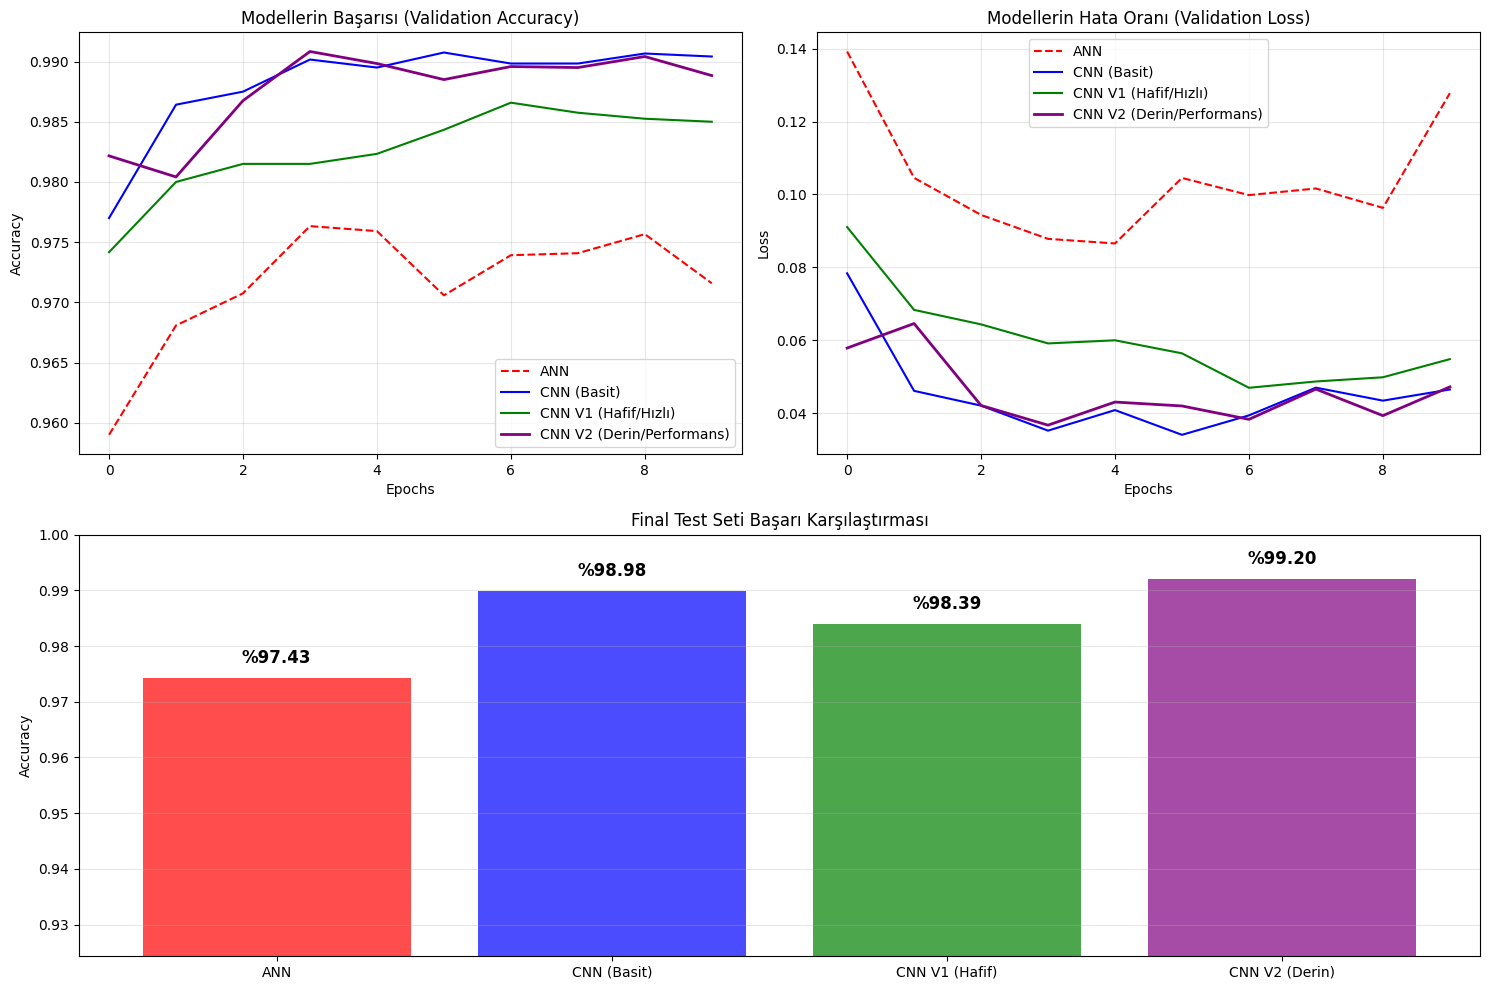

In [6]:
# 6- SONUÇLARIN GÖRSELLEŞTİRİLMESİ VE KARŞILAŞTIRMA
import matplotlib.pyplot as plt

# Grafik boyutunu ayarlama
plt.figure(figsize=(15, 10))

# 1. Grafik: Doğruluk (Accuracy) Karşılaştırması
plt.subplot(2, 2, 1)
plt.plot(history_ann.history['val_accuracy'], 'r--', label='ANN')
plt.plot(history_cnn.history['val_accuracy'], 'b', label='CNN (Basit)')
plt.plot(history_v1.history['val_accuracy'], 'g', label='CNN V1 (Hafif/Hızlı)')
plt.plot(history_v2.history['val_accuracy'], 'purple', label='CNN V2 (Derin/Performans)', linewidth=2)
plt.title('Modellerin Başarısı (Validation Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Grafik: Kayıp (Loss) Karşılaştırması
plt.subplot(2, 2, 2)
plt.plot(history_ann.history['val_loss'], 'r--', label='ANN')
plt.plot(history_cnn.history['val_loss'], 'b', label='CNN (Basit)')
plt.plot(history_v1.history['val_loss'], 'g', label='CNN V1 (Hafif/Hızlı)')
plt.plot(history_v2.history['val_loss'], 'purple', label='CNN V2 (Derin/Performans)', linewidth=2)
plt.title('Modellerin Hata Oranı (Validation Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Grafik: Final Test Başarıları (Bar Chart)
plt.subplot(2, 1, 2)
models = ['ANN', 'CNN (Basit)', 'CNN V1 (Hafif)', 'CNN V2 (Derin)']
accuracies = [acc_ann, acc_cnn, acc_v1, acc_v2]
colors = ['red', 'blue', 'green', 'purple']

bars = plt.bar(models, accuracies, color=colors, alpha=0.7)

# Sütunların üzerine yüzde değerlerini yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f'%{yval*100:.2f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Final Test Seti Başarı Karşılaştırması')
plt.ylabel('Accuracy')
plt.ylim(min(accuracies)-0.05, 1.0) # Farkı görebilmek için alt sınırı ayarla
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Özetle: Kod, aynı problemi 4 farklı zeka seviyesindeki  modele çözdürüyor:

ANN: Resmi düz bir çizgi gibi okuyor (Resimdeki komşuluk ilişkilerini kaybediyor).

Basit CNN: Resmi resim olarak okuyor, temel özellikleri çıkarıyor.

Hafif CNN: Daha az kapasiteyle aynı işi yapmaya çalışıyor.

Derin CNN: Resmi çok daha detaylı analiz ediyor (En yüksek başarı genellikle).
